In [12]:
import warnings
warnings.filterwarnings("ignore")
import constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

points = const.POINTS
features = const.FEATURES

In [13]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [14]:
# import centralized data
t1 = file_len("centralized.txt")
central = np.loadtxt("centralized.txt").reshape(t1,features + 1)
w_central = central[:,0:features]
epoch_central = central[:,features]
norm_central = np.apply_along_axis(np.linalg.norm, 1 ,w_central )

# import periodic data
t2 = file_len("periodic.txt")
periodic = np.loadtxt("periodic.txt").reshape(t2,features + 1)
w_periodic = periodic[:,0:features]
epoch_periodic = periodic[:,features]
norm_periodic = np.apply_along_axis(np.linalg.norm, 1 ,w_periodic )

# import gm data
# import gm data
t2 = file_len("gm.txt")
gm = np.loadtxt("gm.txt").reshape(t2,features + 1)
w_gm = gm[:,0:features]
epoch_gm = gm[:,features]
norm_gm = np.apply_along_axis(np.linalg.norm, 1 ,w_gm )

In [15]:
# transform to pandas dataframes
df_norm_central =pd.DataFrame(data=norm_central,columns=["central"])
df_norm_central.loc[:,'time'] = pd.Series(epoch_central,
                                          index=df_norm_central.index)

df_norm_periodic =pd.DataFrame(data=norm_periodic,columns=["periodic"])
df_norm_periodic.loc[:,'time'] = pd.Series(epoch_periodic,
                                           index=df_norm_periodic.index)

df_norm_gm =pd.DataFrame(data=norm_gm,columns=["gm"])
df_norm_gm.loc[:,'time'] = pd.Series(epoch_gm,
                                           index=df_norm_gm.index)

merged = pd.merge(df_norm_central, df_norm_gm,
                  on='time',how='outer').sort_values(by='time').iloc[0:1000]

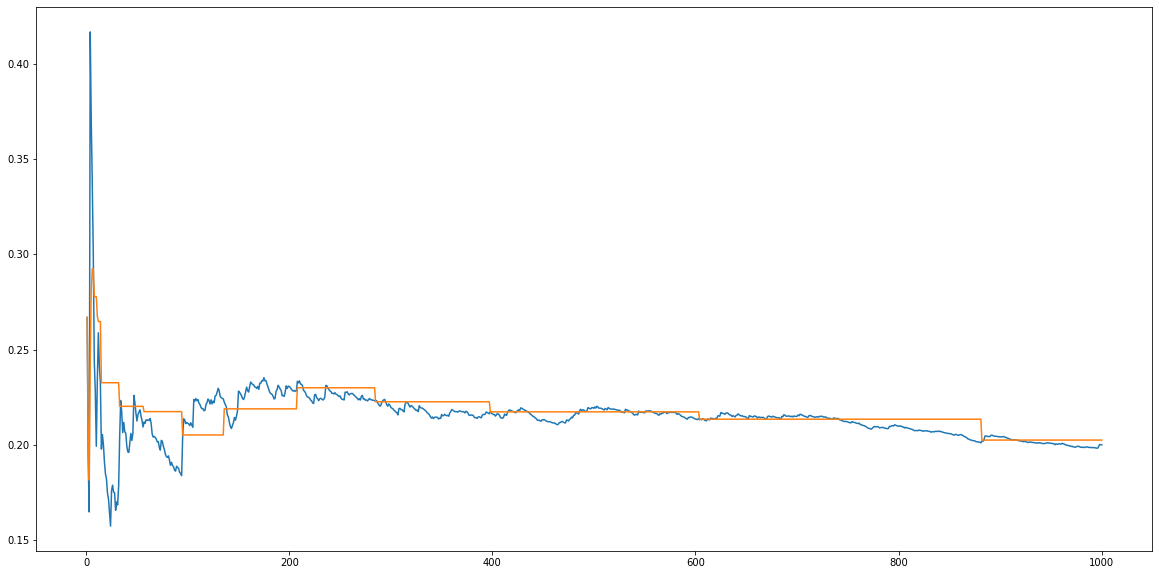

In [16]:
# plot diagrams
x_axis = merged['time']
# y_periodic = merged['periodic'].fillna(method='ffill')
y_gm = merged['gm'].fillna(method='ffill')
y_central = merged['central']


plt.figure(figsize=(20,10))
plt.plot(x_axis, y_central)
plt.plot(x_axis, y_gm)
#plt.plot(x_axis, y_gm)
#plt.fill_between(x_axis, y_central, y_periodic, color="grey", alpha="0.3")